# Homework 3

## Problem 1

We used the variational method to solve for an approximate ground state and its energy for a particle confined in a box. The trial wavefunction we employed is

$$
\psi_\text{trial}(x) = x^\alpha (L-x)^\beta
$$

You might have noticed that the resulting values of $\alpha$ and $\beta$ are the same. This is because the potential, $V(x) = 0$ inside the box, is symmetric. Let us redo the calculation with a potential that is asymmetric in this problem.

Consider a particle confined in a box of length $L$. This particle is subject to a potential given by

$$
V(x) = \left\{ \begin{array}{cl}
               +\infty & x \le 0 \\
               0 & 0 \lt x \lt L/2 \\
               +V_0 & L/2 \le x \lt L \\
               +\infty & x \ge L
               \end{array}\right.
$$

The Hamiltonian operator now becomes

$$
\hat{\mathcal{H}} = -\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + V(x)
$$

Let us employ the same trial wavefunction as before, and define $\gamma \equiv V_0 / (\hbar^2/2mL^2)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import warnings
warnings.filterwarnings("ignore")# ignore warnings
from IPython.display import Markdown

# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams["text.usetex"] = True
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 13,
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{amsfonts}"
})

Answer = lambda ans: Markdown("""
<div style='color: blue!important'>%s</div>
"""%ans)

### Problem 1.1 (2 points)

With the change of variable $u = x/L$, write down the expectation value of energy in units of $\hbar^2/2mL^2$ in a **Markdown cell**.

#### Write your formula here
The trial solution of wave function is 
$$
\psi_\text{trial}(x) = x^\alpha (L-x)^\beta 
= L^{\alpha+\beta} \left(\frac{x}{L}\right)^\alpha \left(1-\left(\frac{x}{L}\right)\right)^\beta
$$
after changing the variable $u=x/L$, we have
$$
\psi_\text{trial}(u) = L^{\alpha+\beta}u^{\alpha}(1-u)^{\beta}
$$
and the first derivative of trial solution is
$$
\begin{aligned}
\frac{d}{du}\psi_\text{trial}(u) 
&= L^{\alpha+\beta}\frac{d}{du}u^{\alpha}(1-u)^{\beta}\\[2ex]
&= L^{\alpha+\beta} u^{\alpha}(1-u)^{\beta} \left(\alpha u^{-1} - \beta \left(1-u\right)^{-1}\right)\\[2ex]
&= L^{\alpha+\beta} u^{\alpha}(1-u)^{\beta} \left(\frac{\alpha}{u} - \frac{\beta}{1-u}\right)
\end{aligned}
$$
then the second derivative of trial solution is
$$
\begin{aligned}
\frac{d^2}{du^2}\psi_\text{trial}(u) &=
L^{\alpha+\beta} u^\alpha (1-u)^\beta
\left( \alpha (\alpha-1) u^{-2} - 2 \alpha \beta u^{-1} (1-u)^{-1} + \beta (\beta-1) (1-u)^{-2} \right)\\[2ex]
&=
L^{\alpha+\beta} u^\alpha (1-u)^\beta
\left( \frac{\alpha (\alpha-1)}{ u^{2}} - \frac{2 \alpha \beta }{u(1-u)} + \frac{\beta (\beta-1)}{(1-u)^{2} }\right)
\end{aligned}
$$
then
$$
\begin{aligned}
\langle \psi_\text{trial} | \hat{\mathcal{H}} | \psi_\text{trial} \rangle 
&=\left\langle \psi_\text{trial} \left| -\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + V(x)\right| \psi_\text{trial} \right\rangle\\[2ex]
&= -\frac{\hbar^2}{2mL^2}\left(\psi_\text{trial}(u)  \frac{d^2}{du^2} \psi_\text{trial}(u) - \frac{2mL^2 V_0 V(x)}{\hbar^2V_0} \left(\psi_\text{trial}(u)\right)^2\right)\\[2ex]
&= -\frac{\hbar^2}{2mL^2}\left(\psi_\text{trial}(u)  \frac{d^2}{du^2} \psi_\text{trial}(u) - V_0/(\hbar^2/2mL^2)\frac{V(x)}{V_0} \left(\psi_\text{trial}(u)\right)^2\right)\\[2ex]
&= -\frac{\hbar^2}{2mL^2}\left(\psi_\text{trial}(u)  \frac{d^2}{du^2} \psi_\text{trial}(u) - \gamma\frac{V(x)}{V_0} \left(\psi_\text{trial}(u)\right)^2\right)\\[2ex]
\end{aligned}
$$
and the expectation value of energy becomes
$$
\langle E\,\rangle=\frac{\langle \psi_\text{trial} | \hat{\mathcal{H}} | \psi_\text{trial} \rangle}
     {\langle \psi_\text{trial} | \psi_\text{trial} \rangle}
= -\left(\frac{\hbar^2}{2mL^2}\right)
  \frac{
      \displaystyle \int_{0}^{1} \left( \psi_\text{trial}(u)  \frac{d^2}{du^2} \psi_\text{trial}(u)\right)du 
       - \gamma
      \displaystyle \int_{1/2}^{1} \left(\psi_\text{trial}(u)\right)^2du
      }
      {\displaystyle \int_0^1 \psi_\text{trial}(u) \ \psi_\text{trial}(u) du}
$$

### Problem 1.2 (2 points)

Define the function to be minimized according to your formula in Problem 1.1.

In [2]:
# Write your code here
from scipy import integrate
from scipy import integrate

def Energy_expectation(args, gamma=1):
    
    a, b = args[0], args[1]
    
    def psi_trial(u):
        return u**a * (1-u)**b
    
    def ddpsi_trial(u):
        return psi_trial(u) * (a*(a-1)/u**2 - 2*a*b/u/(1-u) + b*(b-1)/(1-u)**2)
    
    def integrand_up_left(u):
        return psi_trial(u) * ddpsi_trial(u)
    
    def integrand_up_right(u):
        return psi_trial(u)**2 * gamma
    
    def integrand_down(u):
        return psi_trial(u) * psi_trial(u)
    
    E_up_left, _  = integrate.quadrature(integrand_up_left,  0.0, 1.0)
    E_up_right, _ = integrate.quadrature(integrand_up_right, 0.5, 1.0)
    E_down, _     = integrate.quadrature(integrand_down,     0.0, 1.0)
    
    return -(E_up_left - E_up_right)/E_down

### Problem 1.3 (2 points)

Let $\gamma = 2$. Find the optimal values of $\alpha$ and $\beta$ by minimizing the expectation value of energy. What are the resulting values of $\alpha$ and $\beta$? What is your estimate of the ground-state energy?

In [3]:
# Write your code here
E_gamma2 = lambda args: Energy_expectation(args, gamma=2)
opt_result = optimize.minimize(E_gamma2, [2, 2], method='BFGS')
args_opt = opt_result.x
(alpha,beta) = (args_opt[0],args_opt[1])

E_opt_result = E_gamma2(args_opt)
Answer(r"""
When the $\alpha\approx%.2f$ and $\beta\approx%.2f$, which is

$$
\qquad\psi(x)\approx x^{\alpha}(L-x)^{\beta},\quad
\begin{cases}
\alpha\approx%.16f\\ 
\beta\approx%.16f
\end{cases}
$$

we have the gorund-state energy 

$$
\qquad E\approx -\frac{\hbar^2}{2mL^2}\times%.16f
$$
"""%(alpha,beta,alpha,beta, E_opt_result))


<div style='color: blue!important'>
When the $\alpha\approx1.09$ and $\beta\approx1.14$, which is

$$
\qquad\psi(x)\approx x^{\alpha}(L-x)^{\beta},\quad
\begin{cases}
\alpha\approx1.0901970192420305\\ 
\beta\approx1.1412831216328987
\end{cases}
$$

we have the gorund-state energy 

$$
\qquad E\approx -\frac{\hbar^2}{2mL^2}\times10.8818351885166162
$$
</div>


### Problem 1.4 (2 points)

Plot the approximate (normalized) ground-state wavefunction.

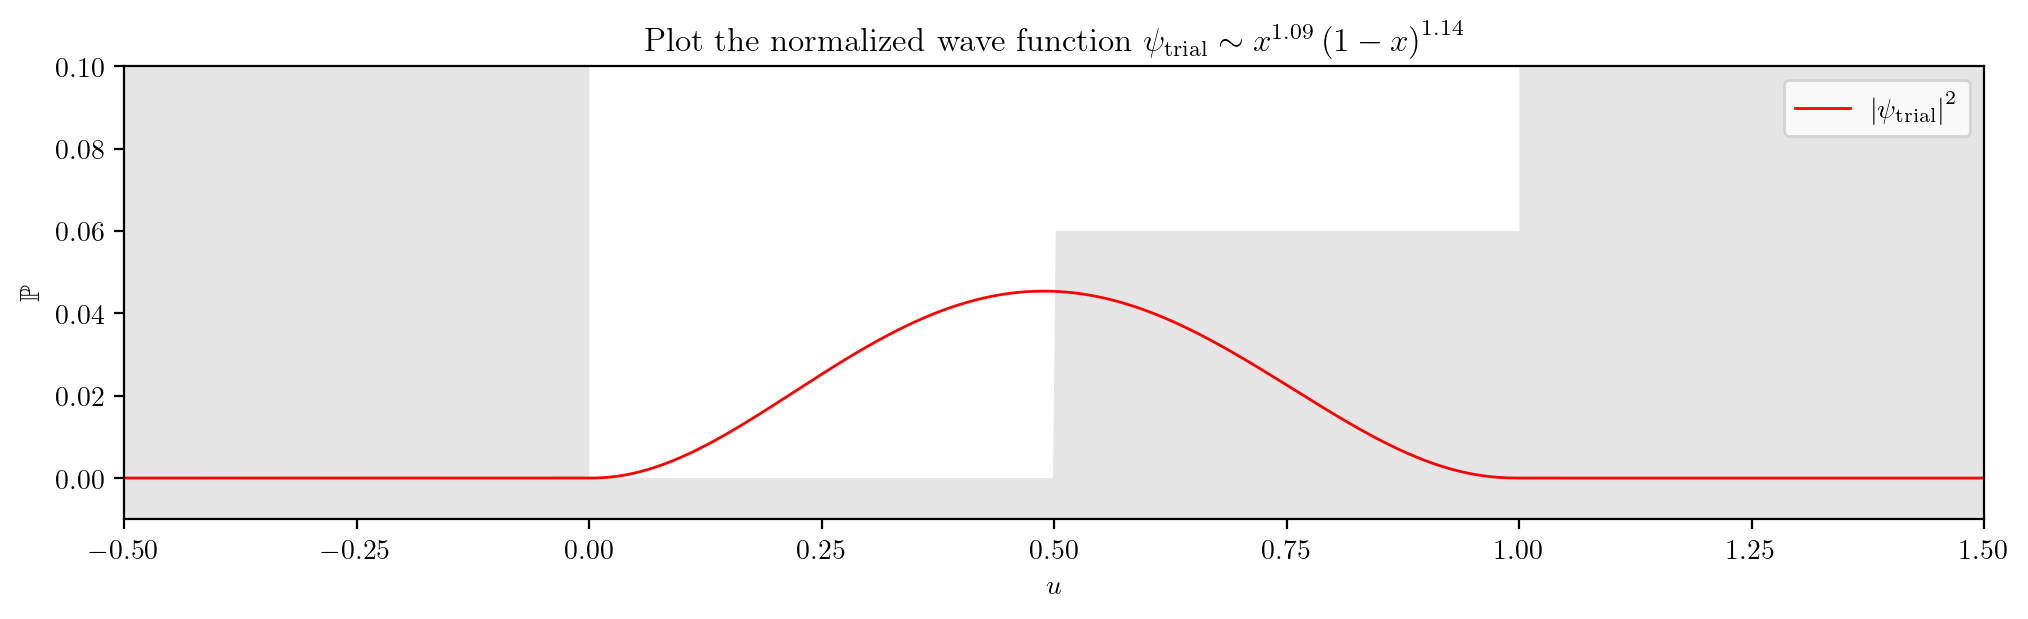

In [4]:
# Write your code here
def ground_state(u):
    def fun(u):
        return u**alpha * ( 1 - u )**beta
    total = integrate.quadrature(fun,0.0, 1.0)
    u *= np.array([1])
    phi = fun(u)
    phi[u<0] = 0
    phi[u>1] = 0
    return phi

def graph_potential(u):
    u *= np.array([1])
    V = u*0 + 0.06
    V[u<0.5] = 0
    V[u<0] = 10
    V[u>1] = 10
    return V

n = 1000
u = np.linspace(-1, 2, n)
phi = ground_state(u)
V = graph_potential(u)

plt.figure(dpi=200,figsize=(12,3))
plt.fill_between(u, -1, V, color='gray', alpha=0.2,linewidth=0)
plt.plot(u, phi**2, color='red',linewidth=1,label=r'$\left|\psi_{\rm trial}\right|^2$')
plt.ylim(-0.01,0.1)
plt.xlim(-0.5,1.5)
plt.title(r"Plot the normalized wave function $\psi_{\rm trial} \sim x^{%.2f}\left(1-x\right)^{%.2f}$"%(alpha,beta))
plt.xlabel(r'$u$')
plt.ylabel(r'$\mathbb{P}$')
plt.legend()
plt.show()

## Problem 2

We have seen that the liquid drop model (LDM) is a very successful model for the description of nuclear binding energies. Can the model do as well for other bulk properties of the nuclei, such as their charge radii? Let us explore this in this problem.

We adopt a model of the same form as before, namely,

$$
R_\text{ch}(Z,N) = a_V A - a_S A^\frac{2}{3} - a_C \frac{Z^2}{A^\frac{1}{3}} - a_A \frac{(N-Z)^2}{A} \pm a_P \frac{1}{A^\frac{3}{4}}
$$

Each term has the same physical meaning as in the original LDM (in particular, the pairing term is $+a_P$ if $Z$ and $N$ are both even, $-a_P$ if $Z$ and $N$ are both odd, and $0$ otherwise), but now the parameters are all in unit of $\text{fm}$ ($1 \text{fm} = 10^{-15} \text{m}$).

To date, people have measured the charge radius for more than $900$ nuclei. The experimental data ($R_\text{ch}$) along with uncertainties ($dR_\text{ch}$) can be found in the file, `IAEA_ChargeRadii.xlsx`. Notice that some data are missing in this data set.

**References**
- [Nuclear Charge Radii](https://www-nds.iaea.org/radii/), Nuclear Data Service, International Atomic Energy Agency

In [5]:
import pandas as pd
# !pip install openpyxl

### Problem 2.1 (1 point)

Read in the data and throw away those nuclei that do not have $R_\text{ch}$ and $dR_\text{ch}$. Let us also discard the nuclei before oxygen ($Z = 8$). Save ($Z$, $N$) in `xdata`, $R_\text{ch}$ in `ydata`, and $dR_\text{ch}$ in `sigma` in a way that `xdata.shape = (2, n)`, `ydata.shape = (n,)`, and `sigma.shape = (n,)`, where $n$ is the number of data points (excluding missing data).

In [6]:
# Write your code here
# !ls *.xlsx
file = pd.ExcelFile('IAEA_ChargeRadii.xlsx')
df = pd.read_excel(file, sheet_name=file.sheet_names[0])
df = df.dropna(subset=["Rch (fm)"], axis=0)
df = df.dropna(subset=["dRch (fm)"], axis=0)
index_of_Z_is8 = df['Z'].isin([8]).argmax()
df = df.iloc[index_of_Z_is8:,:]
df.fillna(method='ffill', inplace=True)

n = df.shape[0]
xdata = df[['Z','N']].to_numpy()
ydata = df['Rch (fm)'].to_numpy()
sigma = df['dRch (fm)'].to_numpy()

print("n          \t=\t%s"%str(n))
print("xdata.shape\t=\t%s"%str(xdata.shape))
print("ydata.shape\t=\t%s"%str(ydata.shape))
print("sigma.shape\t=\t%s"%str(sigma.shape))

n          	=	885
xdata.shape	=	(885, 2)
ydata.shape	=	(885,)
sigma.shape	=	(885,)


### Problem 2.2 (1 point)

Define the liquid drop model, which takes ($Z$, $N$)'s and the free parameters, and returns charge radii.

$$
R_\text{ch}(Z,N) = a_V A - a_S A^\frac{2}{3} - a_C \frac{Z^2}{A^\frac{1}{3}} - a_A \frac{(N-Z)^2}{A} \pm a_P \frac{1}{A^\frac{3}{4}}
$$

In [7]:
# Write your code here
def Rch_LDM(args, aV, aS, aC, aA, aP):
    (Z, N) = args
    A = Z + N
    aP = aP * (1 - Z%2 - N%2)
    R = aV * A - aS * A**(2/3) - aC * Z**2/A**(1/3) - aA * (N-Z)**2/A + aP/A**(3/4)
    return R

### Problem 2.3 (2 points)

Minimize the $\chi^2$ function with Levenberg-Marquardt method. You have to make an initial guess of the parameters. What are the resulting values of the parameters? What are their uncertainties? What is the minimum value of $\chi^2$ you got?

In [8]:
# Write your code here
paras0 = [-0.13, -0.69, -0.01, -0.21, 0.11]
paras_opt, paras_cov = optimize.curve_fit(Rch_LDM, xdata.T, ydata, p0=paras0, sigma=sigma, method='lm')
uncertainty = np.sqrt(np.diag(paras_cov))

deltaV, deltaS, deltaC, deltaA, deltaP = uncertainty
aV, aS, aC, aA, aP = paras_opt

Rch_LCD_opt = Rch_LDM(xdata.T, aV, aS, aC, aA, aP)
chi2 = np.sum(((Rch_LCD_opt - ydata)/sigma)**2)

Answer(r"""
The parameter $a$ and uncertainty $\Delta$ I get are

$$
\quad\quad\begin{cases}
a_V = %.16f,&\Delta=%.16f\\ 
a_S = %.16f,&\Delta=%.16f\\ 
a_C = %.16f,&\Delta=%.16f\\ 
a_A = %.16f,&\Delta=%.16f\\ 
a_P = %.16f,&\Delta=%.16f\\ 
\end{cases}
$$

with $\chi^2 \approx %.16f$.
"""%(aV, aS, aC, aA, aP, deltaV, deltaS, deltaC, deltaA, deltaP, chi2))


<div style='color: blue!important'>
The parameter $a$ and uncertainty $\Delta$ I get are

$$
\quad\quad\begin{cases}
a_V = -0.1326191601094265,&\Delta=-0.6863324386293601\\ 
a_S = -0.0062165024155346,&\Delta=-0.2132106089932266\\ 
a_C = 0.1062231406650051,&\Delta=0.0013432306245453\\ 
a_A = 0.0041686531237383,&\Delta=0.0000952761808539\\ 
a_P = 0.0035869954144955,&\Delta=0.1078813441733622\\ 
\end{cases}
$$

with $\chi^2 \approx 406206.1030893406132236$.
</div>


### Problem 2.4 (2 points)

Show the correlation coefficients of the parameters with a heatmap.
$$
\mathrm{COV}\left(X,Y\right) 
= \frac{\displaystyle \mathrm{COR}\left(X,Y\right)}
        {\displaystyle \sqrt{\mathrm{Var}\left(X\right)\mathrm{Var}\left(Y\right)}}
$$

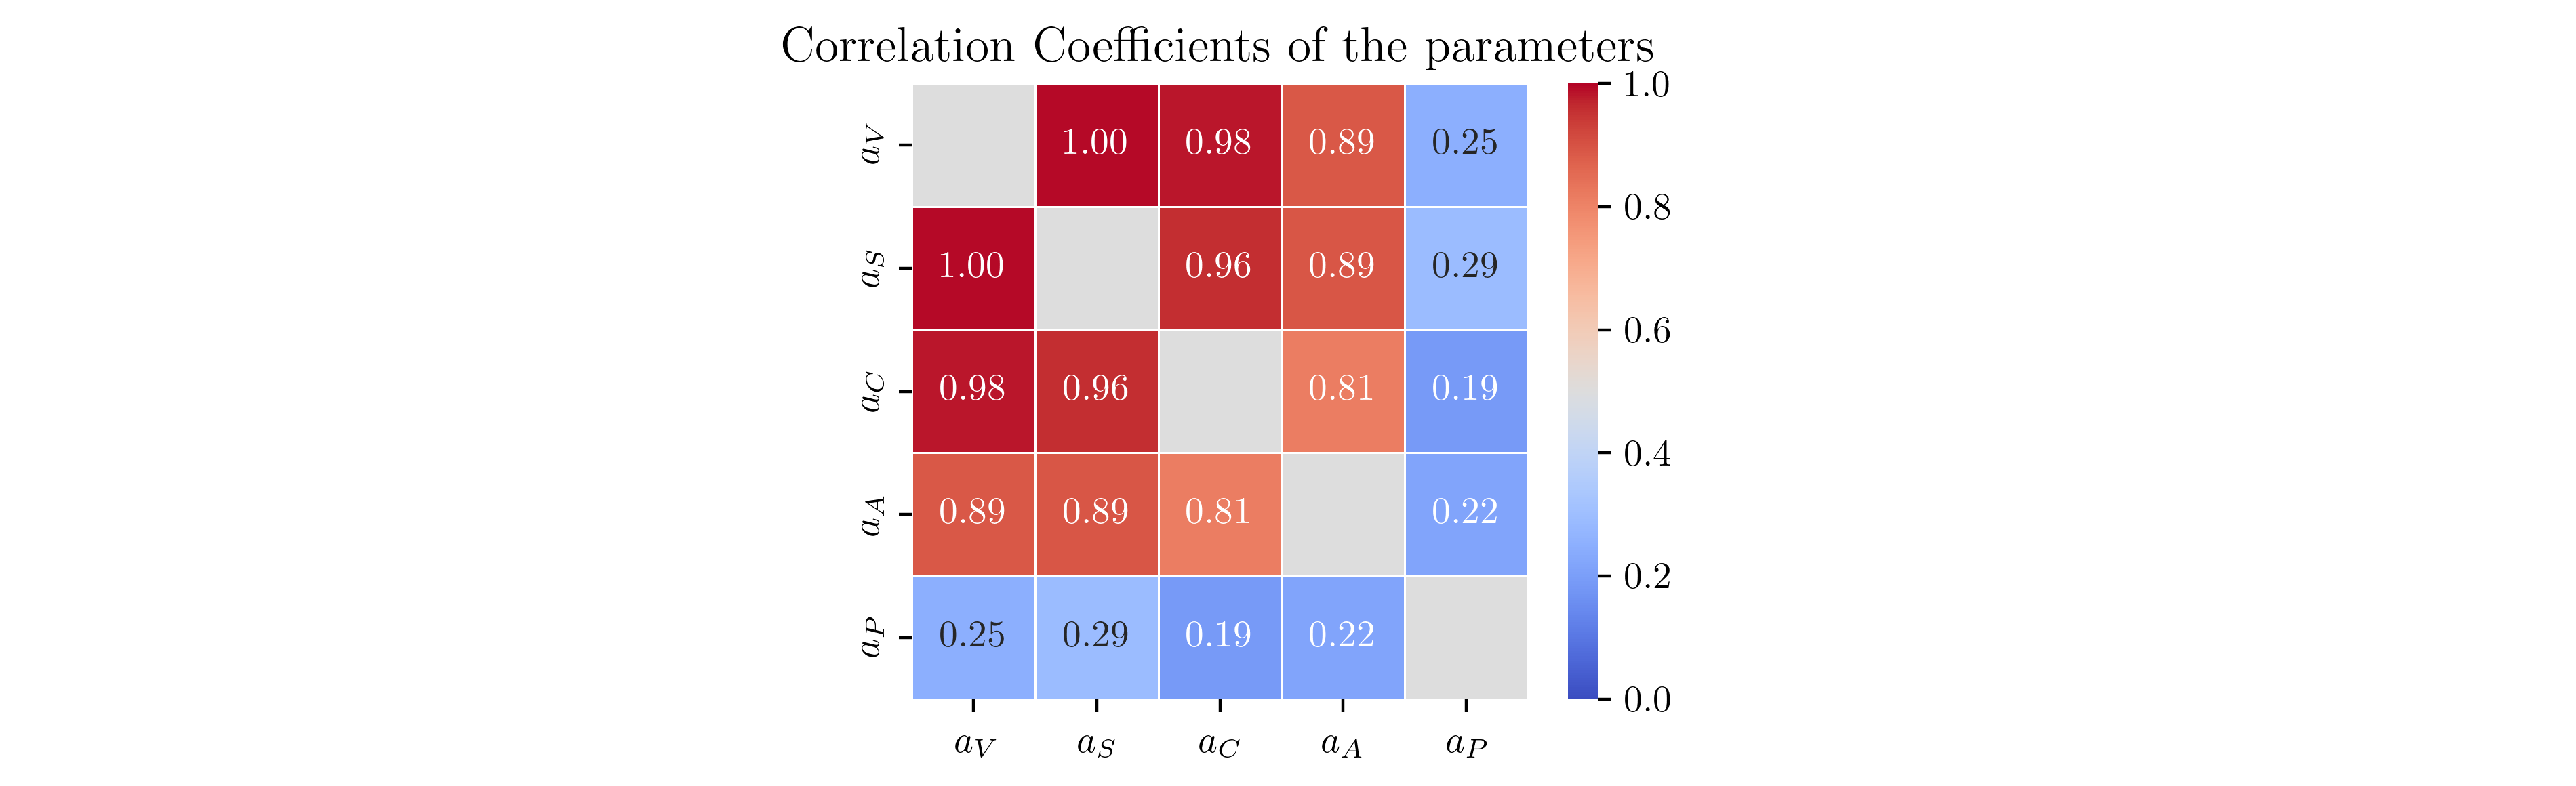

In [9]:
# Write your code here
import seaborn as sns

correlation = np.zeros([5,5])
for i in range(5):
    for j in range(5):
        correlation[i,j] = paras_cov[i,j] / np.sqrt(paras_cov[i,i] * paras_cov[j,j])
        if i == j:
            correlation[i,j] = np.nan
            # ignore COV(X,X) = COV(Y,Y) = 1

labels = [r"$a_V$", r"$a_S$", r"$a_C$", r"$a_A$", r"$a_P$"]
size = np.array([3.2,1])

fig,ax = plt.subplots(1,3,figsize=size*3,dpi=400,facecolor='#fff')
fig.subplots_adjust(top=0.5,bottom=0.1)
[ax[i_ax].axis('off') for i_ax in [0,2]]
ax[1].set_facecolor('#ddd')
sns.heatmap(correlation, ax=ax[1], vmin=0, vmax=1, cmap='coolwarm', 
            square=True, linewidth=0.5, annot=True, fmt='.2f',
            xticklabels=labels, yticklabels=labels)
ax[1].set_title("Correlation Coefficients of the parameters", fontsize=13)
fig.tight_layout()
plt.show()

### Proble 2.5 (2 points)

Plot the components of each eigenvector of the curvature matrix. Remember to label each plot with the corresponding eigenvalue.

$$
\mathcal{M} = \frac{1}{2} \frac{\partial^2 \chi^2}{\partial x_i \partial x_j}
$$

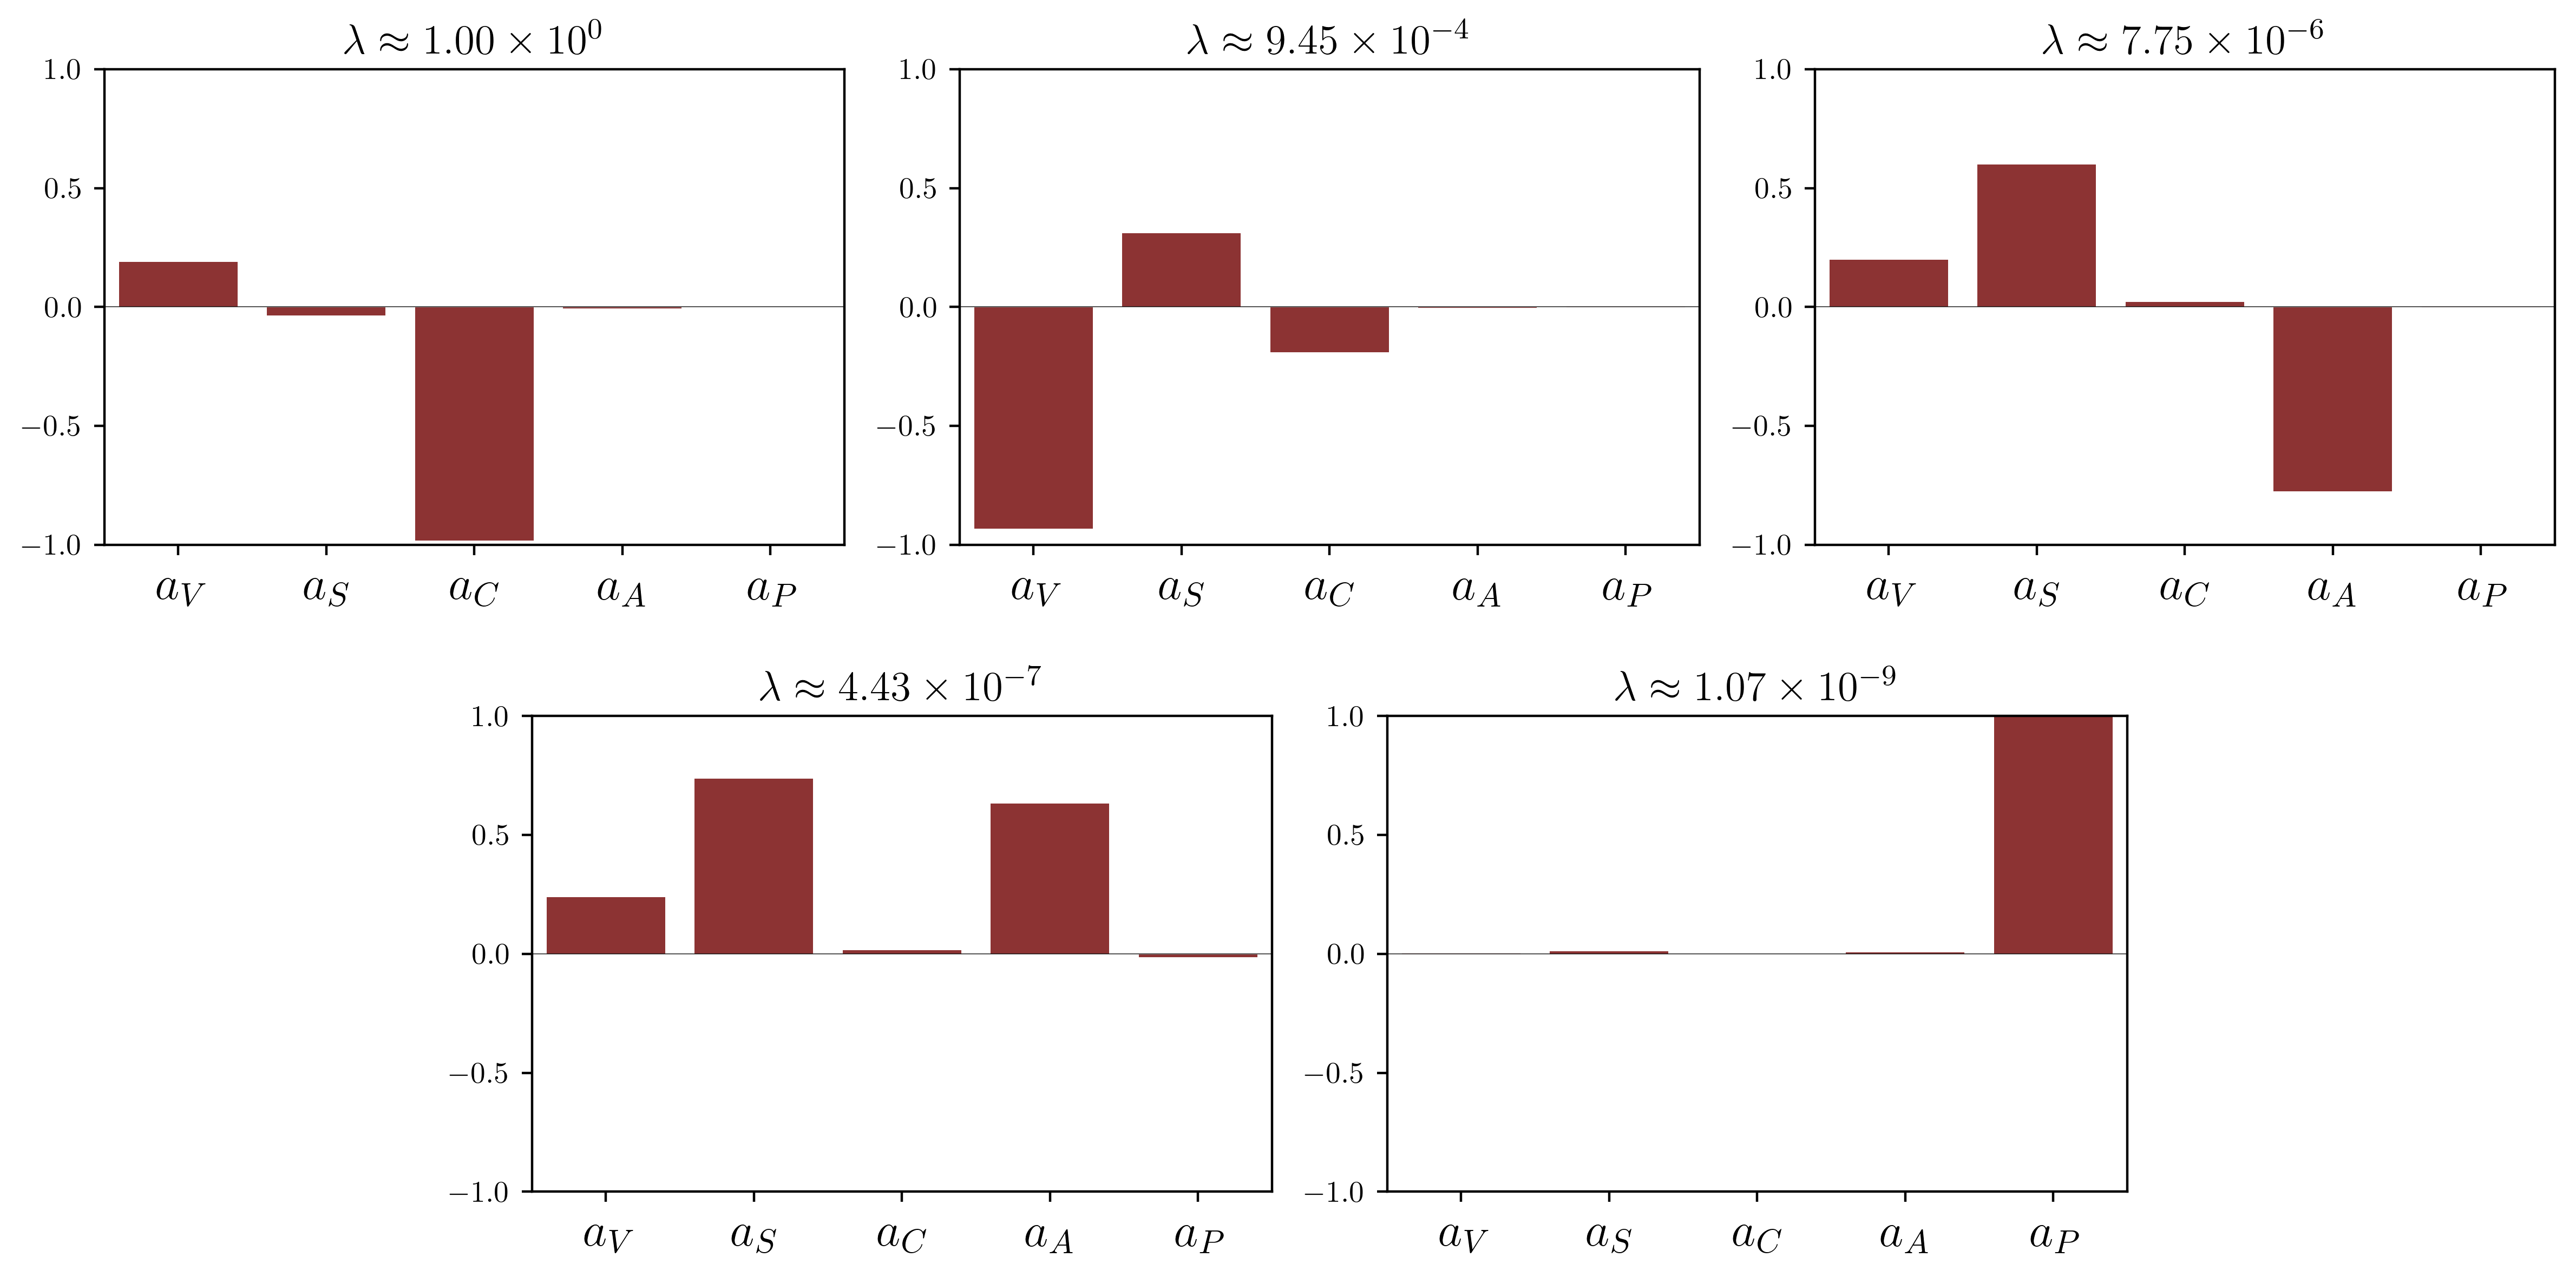

In [10]:
# Write your code here
curve_mat = np.linalg.inv(paras_cov)
eign_vals, eign_vecs = np.linalg.eig(curve_mat)
eign_vals

latex_exp = lambda x,dig=1: ("%.{}e".format(dig)%x)[:int(2+dig)] + r"\times10^{%d}"%int(np.floor(np.log10(x)))

axs_locat= [(0,0), (0,2), (0,4), (1,1), (1,3)]
fig = plt.figure(figsize=(12,6), dpi=400)
axs = [plt.subplot2grid(shape=(2,6), loc=axs_locat[i], colspan=2) for i in range(5)]

for i in range(5):
    eign_vec = eign_vecs[:,i]
    eign_val = eign_vals[i]/np.max(eign_vals)
    
    ax = axs[i]
    xstick_pos = [i for i in range(5)]
    ax.bar(xstick_pos, eign_vec, color='#700000', alpha=0.8)
    ax.hlines(y=0, xmin=-1, xmax=5, color='#000', linewidth=0.3)
    ax.set_xlim(-0.5, 4.5)
    ax.set_ylim(-1, 1)
    xstick_label = [r'$a_V$', r'$a_S$', r'$a_C$', r'$a_A$', r'$a_P$']
    ax.set_xticks(xstick_pos, xstick_label, fontsize=16)
    ax.axhline(y=0, color='#ccc', linewidth=0.1)
    ax.set_title(r'$\lambda \approx %s$'%latex_exp(eign_val,dig=2), fontsize=14)

fig.tight_layout(h_pad=2)
plt.show()